# Preparation

In [ ]:
# Install packages for compatibility, just ignore errors about version incompatibility of

!pip install tf-keras==2.15 --quiet
!pip install tensorflow==2.15 --quiet
!pip install keras==2.15 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.64 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.


In [ ]:
# Import required packages

import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [ ]:
# Download the training and test sets

!pip install gdown==5.1.0

In [ ]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:01<00:00, 69.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 61.6MB/s]


In [ ]:
# Make variable to assign the csv file

TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

In [ ]:
'''Opens the training file, reads the first line as the header, and prints it.
Then, reads and prints the next line, which represents a data point.'''

with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

 ## Parsing the dataset

In [ ]:
'''Opens a CSV file, skips the header, and parses the data into labels and images.
Labels are stored in one array, while image data is split into 28x28 arrays and stored in another.
Both arrays are converted to NumPy arrays of type float and then returned.'''

def parse_data_from_input(filename):
  with open(filename) as file:
    csv_reader = csv.reader(file, delimiter=',')

    next(file)

    labels = []
    images = []

    for row in csv_reader:
      labels.append(row[0])
      images.append(np.array_split(row[1:], 28))

    labels = np.array(labels).astype("float")
    images = np.array(images).astype("float")

    return images, labels

In [ ]:
# Test the function

training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


## Visualizing the numpy arrays


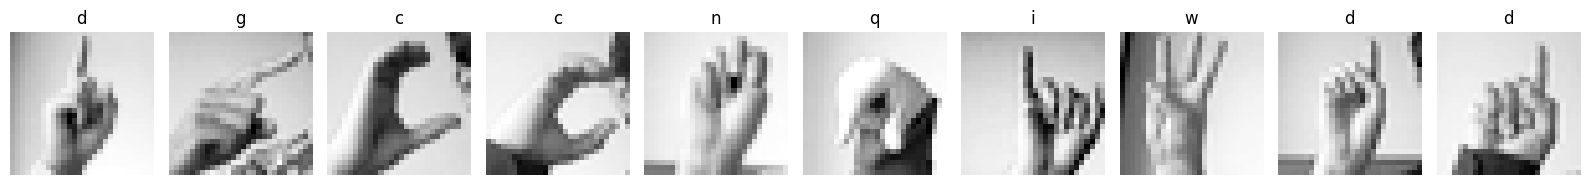

In [ ]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

## Creating the generators for the CNN

In [ ]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  # Add an extra dimension to training and validation images to match the expected input shape of the model
  training_images = np.expand_dims(training_images, axis = -1)
  validation_images = np.expand_dims(validation_images, axis = -1)

  # Create an ImageDataGenerator for training images with various augmentations to prevent overfitting
  train_datagen = ImageDataGenerator(rescale = 1. / 255.,
                                     rotation_range = 40,
                                     width_shift_range = .3,
                                     height_shift_range = .3,
                                     shear_range = .2,
                                     zoom_range = .2,
                                     horizontal_flip = True)

  # Generate batches of augmented data for training
  train_generator = train_datagen.flow(x= training_images,
                                       y= training_labels,
                                       batch_size=32)

  # Create an ImageDataGenerator for validation images with only rescaling (no augmentation)
  validation_datagen = ImageDataGenerator(rescale = 1. / 255.)

  # Generate batches of data for validation (without augmentation)
  validation_generator = validation_datagen.flow(x= validation_images,
                                                 y= validation_labels,
                                                 batch_size=32)

  return train_generator, validation_generator

In [ ]:
# Test the generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


## Coding the CNN


In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation = 'relu'),
          tf.keras.layers.Dense(26, activation = 'softmax')

  ])

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
# Save the model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 19s 17ms/step - loss: 2.8526 - accuracy: 0.1310 - val_loss: 2.4850 - val_accuracy: 0.2160
Epoch 2/15
858/858 [==============================] - 15s 17ms/step - loss: 2.2163 - accuracy: 0.3011 - val_loss: 1.5344 - val_accuracy: 0.4856
Epoch 3/15
858/858 [==============================] - 15s 17ms/step - loss: 1.7357 - accuracy: 0.4385 - val_loss: 1.1372 - val_accuracy: 0.6022
Epoch 4/15
858/858 [==============================] - 14s 17ms/step - loss: 1.4763 - accuracy: 0.5177 - val_loss: 0.9913 - val_accuracy: 0.6695
Epoch 5/15
858/858 [==============================] - 15s 17ms/step - loss: 1.2786 - accuracy: 0.5789 - val_loss: 0.8700 - val_accuracy: 0.6887
Epoch 6/15
858/858 [==============================] - 15s 17ms/step - loss: 1.1418 - accuracy: 0.6244 - val_loss: 0.7019 - val_accuracy: 0.7383
Epoch 7/15
858/858 [==============================] - 14s 17ms/step - loss: 1.0445 - accuracy: 0.6502 - val_loss: 0.7421 - val_accuracy:

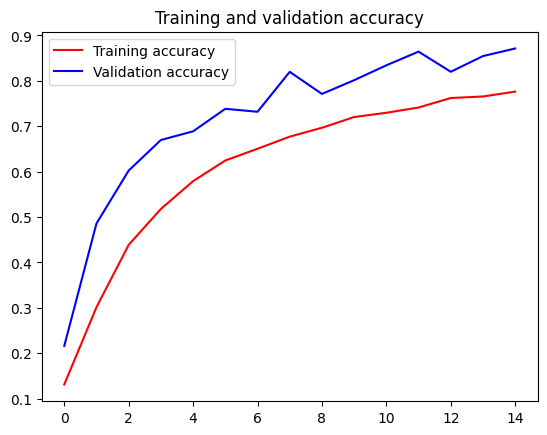

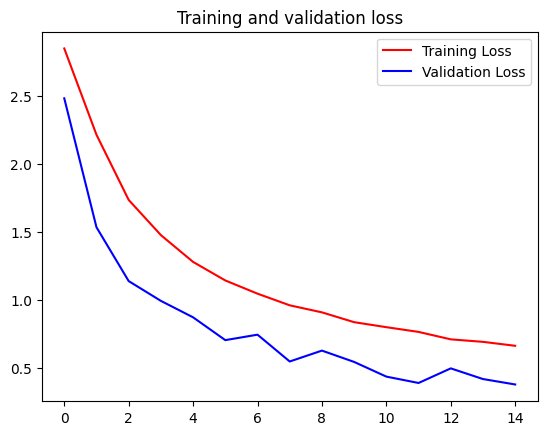

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing The Model

1/1 [==============================] - 0s 18ms/step


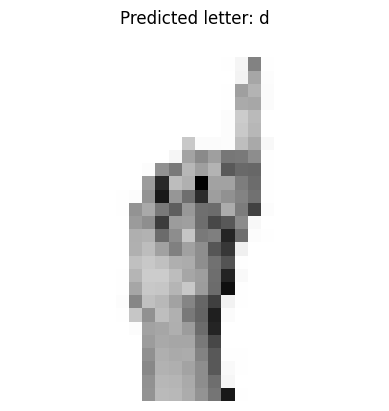

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

letters = list(string.ascii_lowercase)

def predict_and_display_image(img_path, model):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    predicted_letter = letters[predicted_label]

    plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted letter: {predicted_letter}")
    plt.axis('off')
    plt.show()

predict_and_display_image('/content/download.jpg', model)